# Factors Affecting Life Expectancy using Python

The 2 data sets used contain informative data from countries across the globe about;
1. The prevalence of mental health disorders including schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depression, alcohol use disorders.
2. Factors that affect life expectancy in men and women such as status, adult mortality, infant deaths, expenditure, immunization coverage etc.

# 1. Background

In this analysis, we analyzed Life Expectancy Data and Global Trends in Mental Health Disorder from Kaggle:

Life Expectancy Data by Country available here; https://www.kaggle.com/datasets/maryalebron/life-expectancy-data

Global Trends in Mental Health Disorder available here; https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder

# 2. Objectives

The objectives of the analysis are as follows:

1. To see how life expectancy compares between men and women for our selected sample data sets inclusive of developed and developing countries where the developing countries are with East African Community and the 5 developed countries are within Europe.
Why? Less alcohol disorders, comparison of alcohol disorder; other disorders
#To illustrate whether mental health disorders have devastating impacts on life expectancy. 

2. To demonstrate whether income composition of resources has an effect on life expectancy.

3. To demonstrate and visualise whether countries with low GDP have higher cases of mental health disorders.

4. To visualise the prevalence of mental health disorders comparing and contrasting depression, anxiety, bipolar disorder, 
   schizophrenia, eating disorders, alcohol use disorder and drug use disorder across different countries in 2015. 


Start by loading the required libraries;

In [17]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# 3. Data

In [18]:
#Load the first data set i.e. life expectancy data

df1 = pd.read_csv("C:/Users/kinyanjuim/Desktop/Project2_Groupwork/life expectancy data/Life_Expectancy_Data_v2.csv")

In [19]:
#Load the second data set i.e. Global Trends in Mental Health Disorder

df2 = pd.read_csv("C:/Users/kinyanjuim/Desktop/Project2_Groupwork/mental health data/Mental_health_Depression_disorder_Data.csv", 
                  low_memory=False)

In [20]:
#Overview of the columns in df1

print(df1.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy (men)',
       'Life expectancy(women)', 'Adult Mortality (men)',
       'Adult Mortality (women)', 'Infant deaths', 'Alcohol',
       'Percentage expenditure', 'Hepatitis B(men)', 'Hepatitis B(women)',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [21]:
#Overview of the columns in df2

print(df2.columns)

Index(['index', 'Entity', 'Code', 'Year', 'Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy (men)            2938 non-null   int64  
 4   Life expectancy(women)           2938 non-null   int64  
 5   Adult Mortality (men)            2938 non-null   int64  
 6   Adult Mortality (women)          2938 non-null   int64  
 7   Infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   Percentage expenditure           2938 non-null   float64
 10  Hepatitis B(men)                 2938 non-null   int64  
 11  Hepatitis B(women)               2938 non-null   int64  
 12  Measles             

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


In [24]:
df2.rename(columns = {'Entity':'Country'}, inplace = True)

In [25]:
df3 = df2[:6468]

In [26]:
df3.tail()

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6463,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269
6467,6467,Zimbabwe,ZWE,2017,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6468 non-null   int64  
 1   Country                    6468 non-null   object 
 2   Code                       5488 non-null   object 
 3   Year                       6468 non-null   object 
 4   Schizophrenia (%)          6468 non-null   object 
 5   Bipolar disorder (%)       6468 non-null   object 
 6   Eating disorders (%)       6468 non-null   object 
 7   Anxiety disorders (%)      6468 non-null   float64
 8   Drug use disorders (%)     6468 non-null   float64
 9   Depression (%)             6468 non-null   float64
 10  Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 556.0+ KB


In [28]:
df3['Year'] = pd.to_numeric(df3['Year'])

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_3740\2558282477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = pd.to_numeric(df3['Year'])


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6468 non-null   int64  
 1   Country                    6468 non-null   object 
 2   Code                       5488 non-null   object 
 3   Year                       6468 non-null   int64  
 4   Schizophrenia (%)          6468 non-null   object 
 5   Bipolar disorder (%)       6468 non-null   object 
 6   Eating disorders (%)       6468 non-null   object 
 7   Anxiety disorders (%)      6468 non-null   float64
 8   Drug use disorders (%)     6468 non-null   float64
 9   Depression (%)             6468 non-null   float64
 10  Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 556.0+ KB


In [30]:
df4 = df3.loc[df3['Year'] == 2015]

In [31]:
print(df4)

      index                     Country      Code  Year Schizophrenia (%)  \
25       25                 Afghanistan       AFG  2015          0.165895   
53       53                     Albania       ALB  2015           0.20063   
81       81                     Algeria       DZA  2015          0.197728   
109     109              American Samoa       ASM  2015          0.248981   
137     137        Andean Latin America       NaN  2015          0.200693   
...     ...                         ...       ...   ...               ...   
6353   6353  Western Sub-Saharan Africa       NaN  2015          0.174616   
6381   6381                       World  OWID_WRL  2015          0.254459   
6409   6409                       Yemen       YEM  2015          0.172435   
6437   6437                      Zambia       ZMB  2015          0.165027   
6465   6465                    Zimbabwe       ZWE  2015          0.156465   

     Bipolar disorder (%) Eating disorders (%)  Anxiety disorders (%)  \
25

In [32]:
df5=df1.loc[df1['Year'] == 2015]

In [33]:
df4.head()

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
25,25,Afghanistan,AFG,2015,0.165895,0.707275,0.104445,4.875201,2.543144,4.135419,0.662276
53,53,Albania,ALB,2015,0.20063,0.704161,0.171095,3.388212,0.513158,2.204454,1.850252
81,81,Algeria,DZA,2015,0.197728,0.817862,0.211434,5.058398,1.709814,3.636962,0.665817
109,109,American Samoa,ASM,2015,0.248981,0.468434,0.179144,3.316201,0.769507,2.936809,1.141513
137,137,Andean Latin America,NaN,2015,0.200693,0.881143,0.350127,4.266704,0.667189,2.605462,1.548874


In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 25 to 6465
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      231 non-null    int64  
 1   Country                    231 non-null    object 
 2   Code                       196 non-null    object 
 3   Year                       231 non-null    int64  
 4   Schizophrenia (%)          231 non-null    object 
 5   Bipolar disorder (%)       231 non-null    object 
 6   Eating disorders (%)       231 non-null    object 
 7   Anxiety disorders (%)      231 non-null    float64
 8   Drug use disorders (%)     231 non-null    float64
 9   Depression (%)             231 non-null    float64
 10  Alcohol use disorders (%)  231 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 21.7+ KB


In [35]:
df5.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,78,66,97,68,0,4.60,364.975229,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,84,71,52,81,21,NaN,0.000000,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,73,71,93,59,66,NaN,0.000000,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,71,56,58,85,0,NaN,0.000000,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [36]:
merged_data = pd.merge(df4, df5,on='Country' )

In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            162 non-null    int64  
 1   Country                          162 non-null    object 
 2   Code                             162 non-null    object 
 3   Year_x                           162 non-null    int64  
 4   Schizophrenia (%)                162 non-null    object 
 5   Bipolar disorder (%)             162 non-null    object 
 6   Eating disorders (%)             162 non-null    object 
 7   Anxiety disorders (%)            162 non-null    float64
 8   Drug use disorders (%)           162 non-null    float64
 9   Depression (%)                   162 non-null    float64
 10  Alcohol use disorders (%)        162 non-null    float64
 11  Year_y                           162 non-null    int64  
 12  Status                

In [38]:
# merged_data.to_csv('merged_data.csv')

In [39]:
# Dropping columns we don't need
# axis = 1 means columns

mdata = merged_data.drop(merged_data.columns[[0, 2, 11, 31,32,34]], axis=1)

In [40]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          162 non-null    object 
 1   Year_x                           162 non-null    int64  
 2   Schizophrenia (%)                162 non-null    object 
 3   Bipolar disorder (%)             162 non-null    object 
 4   Eating disorders (%)             162 non-null    object 
 5   Anxiety disorders (%)            162 non-null    float64
 6   Drug use disorders (%)           162 non-null    float64
 7   Depression (%)                   162 non-null    float64
 8   Alcohol use disorders (%)        162 non-null    float64
 9   Status                           162 non-null    object 
 10  Life expectancy (men)            162 non-null    int64  
 11  Life expectancy(women)           162 non-null    int64  
 12  Adult Mortality (men) 

In [41]:
# Number of developing and developed countries in the merged data set
mdata['Status'].value_counts()

Developing    133
Developed      29
Name: Status, dtype: int64

In [42]:
# Missing Values
missing_values = mdata.isnull().sum()
print(missing_values)

Country                              0
Year_x                               0
Schizophrenia (%)                    0
Bipolar disorder (%)                 0
Eating disorders (%)                 0
Anxiety disorders (%)                0
Drug use disorders (%)               0
Depression (%)                       0
Alcohol use disorders (%)            0
Status                               0
Life expectancy (men)                0
Life expectancy(women)               0
Adult Mortality (men)                0
Adult Mortality (women)              0
Infant deaths                        0
Alcohol                            157
Percentage expenditure               0
Hepatitis B(men)                     0
Hepatitis B(women)                   0
Measles                              0
BMI                                  2
Under-five deaths                    0
Polio                                0
Total expenditure                  160
Diphtheria                           0
HIV/AIDS                 

<Figure size 1000x600 with 0 Axes>

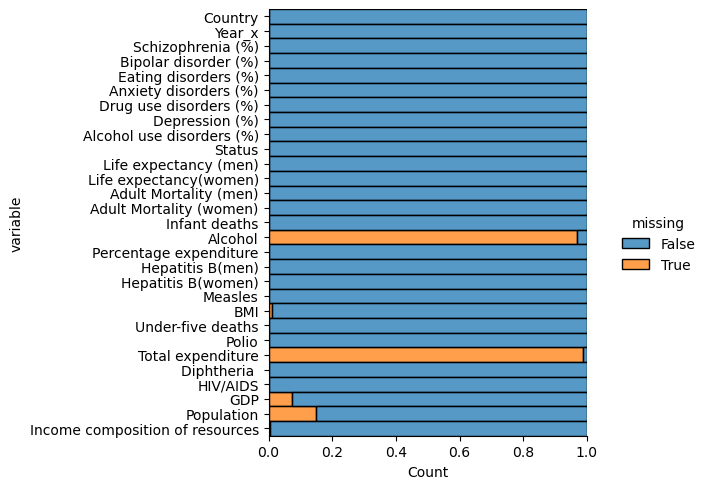

In [44]:
# Plot the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=mdata.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [47]:
# Dealing with missing values
# For BMI, replace missing values with the mean
# For Alcohol and Total expenditure, drop as we already have alcohol use disorders and percentage expenditure
# For Income composition of resources, replace with median

mdata['BMI'] = mdata['BMI'].fillna(mdata['BMI'].mean())

mdata['Income composition of resources'] = mdata['Income composition of resources'].fillna(mdata['Income composition of resources'].median())

mdata = mdata.drop(mdata.columns[[15, 23]], axis=1)


In [48]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          162 non-null    object 
 1   Year_x                           162 non-null    int64  
 2   Schizophrenia (%)                162 non-null    object 
 3   Bipolar disorder (%)             162 non-null    object 
 4   Eating disorders (%)             162 non-null    object 
 5   Anxiety disorders (%)            162 non-null    float64
 6   Drug use disorders (%)           162 non-null    float64
 7   Depression (%)                   162 non-null    float64
 8   Alcohol use disorders (%)        162 non-null    float64
 9   Status                           162 non-null    object 
 10  Life expectancy (men)            162 non-null    int64  
 11  Life expectancy(women)           162 non-null    int64  
 12  Adult Mortality (men) 

In [49]:
# Countries that have missing GDP and Population missing values
# GDP and status and effect on population
subset_missing = mdata[mdata.isnull().any(axis=1)]
subset_missing[['Country', 'GDP', 'Population']]

,Country,GDP,Population
4,Antigua and Barbuda,13566.954100,NaN
10,Bahamas,NaN,NaN
11,Bahrain,22688.878240,NaN
13,Barbados,15557.838100,NaN
34,Congo,NaN,NaN
37,Cuba,762.261218,NaN
43,Egypt,NaN,NaN
46,Eritrea,NaN,NaN
53,Gambia,NaN,NaN
58,Grenada,9212.192824,NaN


In [50]:
# Dropping the rows with missing values for GDP and Population
mdata = mdata.dropna()
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 161
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          137 non-null    object 
 1   Year_x                           137 non-null    int64  
 2   Schizophrenia (%)                137 non-null    object 
 3   Bipolar disorder (%)             137 non-null    object 
 4   Eating disorders (%)             137 non-null    object 
 5   Anxiety disorders (%)            137 non-null    float64
 6   Drug use disorders (%)           137 non-null    float64
 7   Depression (%)                   137 non-null    float64
 8   Alcohol use disorders (%)        137 non-null    float64
 9   Status                           137 non-null    object 
 10  Life expectancy (men)            137 non-null    int64  
 11  Life expectancy(women)           137 non-null    int64  
 12  Adult Mortality (men) 

In [51]:
# Changing data types that ought to be float from object
mdata["Schizophrenia (%)"] = mdata["Schizophrenia (%)"].astype(float)
mdata["Bipolar disorder (%)"] = mdata["Bipolar disorder (%)"].astype(float)
mdata["Eating disorders (%)"] = mdata["Eating disorders (%)"].astype(float)
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 161
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          137 non-null    object 
 1   Year_x                           137 non-null    int64  
 2   Schizophrenia (%)                137 non-null    float64
 3   Bipolar disorder (%)             137 non-null    float64
 4   Eating disorders (%)             137 non-null    float64
 5   Anxiety disorders (%)            137 non-null    float64
 6   Drug use disorders (%)           137 non-null    float64
 7   Depression (%)                   137 non-null    float64
 8   Alcohol use disorders (%)        137 non-null    float64
 9   Status                           137 non-null    object 
 10  Life expectancy (men)            137 non-null    int64  
 11  Life expectancy(women)           137 non-null    int64  
 12  Adult Mortality (men) 

# 4. Exploratory Data Analysis

Produce histograms showing the distributions of Life expectancy (men), Life expectancy(women), Depression (%) and Alcohol use disorders (%).

The black vertical line indicates the mean of the datasets.

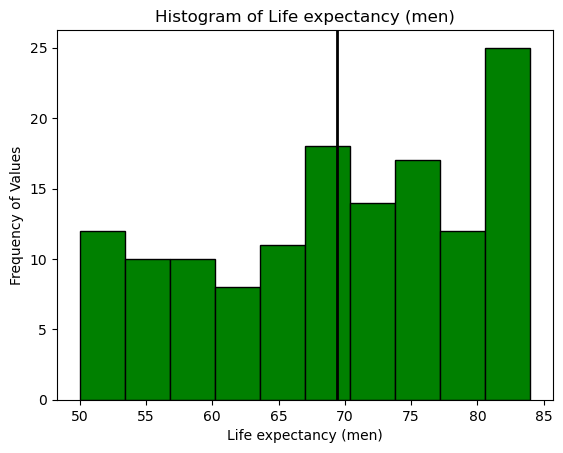

In [52]:
# Histogram of Life expectancy (men)

plt.hist(mdata['Life expectancy (men)'], bins = 10, color = "green", edgecolor = 'black')

plt.xlabel('Life expectancy (men)')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Life expectancy (men)')

# Mean of Sale Price
plt.axvline(mdata['Life expectancy (men)'].mean(), color = "black", linewidth = 2)
plt.show()

In [53]:
# Countries with the highest and least life expectancies??

In [54]:
# Mean
mdata['Life expectancy (men)'].mean()

# Median
mdata['Life expectancy (men)'].median()

# Standard deviation
mdata['Life expectancy (men)'].std()

10.274438344627537

Interpretation of information

In [55]:
"""
Mean of Life expectancy (men) is 68.9
Median of Life expectancy (men) is 69.5
Standard deviation of Life expectancy (men) is 10.315

"""

'\nMean of Life expectancy (men) is 68.9\nMedian of Life expectancy (men) is 69.5\nStandard deviation of Life expectancy (men) is 10.315\n\n'

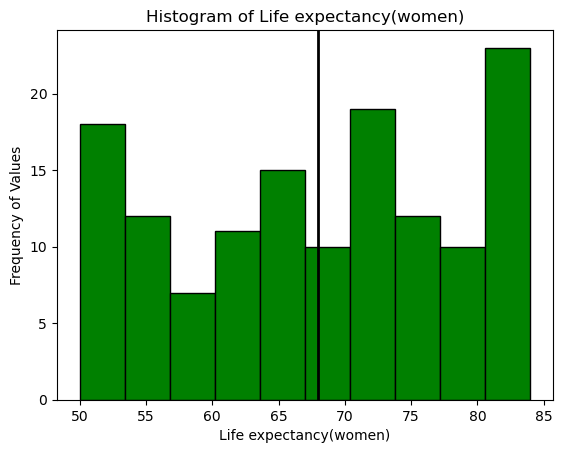

In [56]:
# Histogram of Life expectancy (men)

plt.hist(mdata['Life expectancy(women)'], bins = 10, color = "green", edgecolor = 'black')

plt.xlabel('Life expectancy(women)')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Life expectancy(women)')

# Mean of Sale Price
plt.axvline(mdata['Life expectancy(women)'].mean(), color = "black", linewidth = 2)
plt.show()

Interpretation of information

In [57]:
# Mean
mdata['Life expectancy(women)'].mean()

# Median
mdata['Life expectancy(women)'].median()

# Standard deviation
mdata['Life expectancy(women)'].std()

10.347151617064371

In [58]:
"""
Mean of Life expectancy (men) is 68.17
Median of Life expectancy (men) is 69.0
Standard deviation of Life expectancy (men) is 10.32

"""

'\nMean of Life expectancy (men) is 68.17\nMedian of Life expectancy (men) is 69.0\nStandard deviation of Life expectancy (men) is 10.32\n\n'

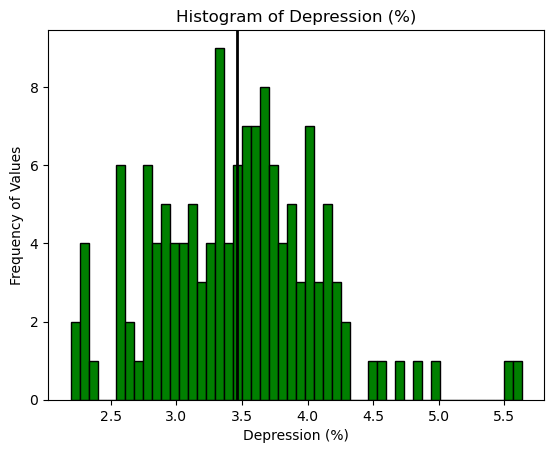

In [59]:
# Histogram of Depression(%)

plt.hist(mdata['Depression (%)'], bins =50, color = "green", edgecolor = 'black')

plt.xlabel('Depression (%)')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Depression (%)')

# Mean of Sale Price
plt.axvline(mdata['Depression (%)'].mean(), color = "black", linewidth = 2)
plt.show()

Interpretation of information

In [60]:
# Mean
mdata['Depression (%)'].mean()

# Median
mdata['Depression (%)'].median()

# Standard deviation
mdata['Depression (%)'].std()

0.6326388309776323

In [61]:
"""
Mean of Depression (%) is 3.44
Median of Depression (%)) is 3.459
Standard deviation of Depression (%) is 0.617

"""

'\nMean of Depression (%) is 3.44\nMedian of Depression (%)) is 3.459\nStandard deviation of Depression (%) is 0.617\n\n'

In [62]:
# Countries in East Africa; Kenya, Rwanda, Uganda, Burundi
# Filter

ea = mdata[(mdata['Country'] == 'Kenya') | (mdata['Country'] == 'Uganda') | 
           (mdata['Country'] == 'Rwanda') | (mdata['Country'] == 'Burundi') | (mdata['Country'] == 'South Sudan')]
ea

,Country,Year_x,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Status,...,Hepatitis B(men),Hepatitis B(women),Measles,BMI,Under-five deaths,Polio,Diphtheria,GDP,Population,Income composition of resources
24,Burundi,2015,0.153772,0.612157,0.089309,3.574121,0.496275,3.723271,1.575593,Developing,...,72,20,9,18.7000,31,94.0,94.0,33.681223,119927.0,0.406
77,Kenya,2015,0.170214,0.641196,0.131502,3.630832,0.483446,3.514888,1.249349,Developing,...,25,54,95,22.0000,75,83.0,89.0,1349.971440,47236259.0,0.550
121,Rwanda,2015,0.162693,0.624513,0.112160,3.689279,0.588300,3.854341,2.347621,Developing,...,64,53,1,21.4000,15,99.0,98.0,71.348397,11629553.0,0.493
137,South Sudan,2015,0.168795,0.625260,0.135115,3.535399,0.499741,3.686892,1.551948,Developing,...,50,67,878,43.1375,39,41.0,31.0,758.725782,11882136.0,0.421
153,Uganda,2015,0.159609,0.609275,0.117042,3.510482,0.539442,4.996004,1.292387,Developing,...,50,24,478,18.5000,93,82.0,78.0,693.896383,414487.0,0.488


In [63]:
ea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 24 to 153
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          5 non-null      object 
 1   Year_x                           5 non-null      int64  
 2   Schizophrenia (%)                5 non-null      float64
 3   Bipolar disorder (%)             5 non-null      float64
 4   Eating disorders (%)             5 non-null      float64
 5   Anxiety disorders (%)            5 non-null      float64
 6   Drug use disorders (%)           5 non-null      float64
 7   Depression (%)                   5 non-null      float64
 8   Alcohol use disorders (%)        5 non-null      float64
 9   Status                           5 non-null      object 
 10  Life expectancy (men)            5 non-null      int64  
 11  Life expectancy(women)           5 non-null      int64  
 12  Adult Mortality (men)  

In [64]:
# Countries in Euope
europe = mdata[(mdata['Country'] == 'France') | (mdata['Country'] == 'Belgium') | 
           (mdata['Country'] == 'Germany') | (mdata['Country'] == 'Sweden') | (mdata['Country'] == 'Denmark')]
europe

,Country,Year_x,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Status,...,Hepatitis B(men),Hepatitis B(women),Measles,BMI,Under-five deaths,Polio,Diphtheria,GDP,Population,Income composition of resources
15,Belgium,2015,0.257675,0.946314,0.598318,5.208646,0.819489,4.110452,1.456476,Developed,...,48,33,47,63.7,1,99.0,99.0,4356.87500,11274196.0,0.895
39,Denmark,2015,0.254433,1.005441,0.540710,5.315579,0.877252,3.281306,1.760998,Developed,...,49,18,9,58.8,0,93.0,93.0,5314.64416,5683483.0,0.923
51,France,2015,0.256537,0.959573,0.569338,6.637445,1.204663,4.299326,1.457863,Developing,...,61,44,157,62.5,3,98.0,98.0,36526.77110,6662468.0,0.894
55,Germany,2015,0.251720,0.779517,0.522847,6.566759,0.893847,3.946206,1.927178,Developed,...,75,65,2464,62.3,3,94.0,95.0,41176.88158,81686611.0,0.924
143,Sweden,2015,0.273600,1.058289,0.564692,5.297058,0.683427,4.513444,1.721177,Developed,...,31,23,22,59.5,0,98.0,98.0,5585.25847,9799186.0,0.909


In [66]:
combined_eaeurope = mdata[(mdata['Country'] == 'France') | (mdata['Country'] == 'Belgium') | 
           (mdata['Country'] == 'Germany') | (mdata['Country'] == 'Sweden') | (mdata['Country'] == 'Denmark')|
              (mdata['Country'] == 'Kenya') | (mdata['Country'] == 'Uganda') | 
           (mdata['Country'] == 'Rwanda') | (mdata['Country'] == 'Burundi') | (mdata['Country'] == 'South Sudan')]
combined_eaeurope

,Country,Year_x,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Status,...,Hepatitis B(men),Hepatitis B(women),Measles,BMI,Under-five deaths,Polio,Diphtheria,GDP,Population,Income composition of resources
15,Belgium,2015,0.257675,0.946314,0.598318,5.208646,0.819489,4.110452,1.456476,Developed,...,48,33,47,63.7000,1,99.0,99.0,4356.875000,11274196.0,0.895
24,Burundi,2015,0.153772,0.612157,0.089309,3.574121,0.496275,3.723271,1.575593,Developing,...,72,20,9,18.7000,31,94.0,94.0,33.681223,119927.0,0.406
39,Denmark,2015,0.254433,1.005441,0.540710,5.315579,0.877252,3.281306,1.760998,Developed,...,49,18,9,58.8000,0,93.0,93.0,5314.644160,5683483.0,0.923
51,France,2015,0.256537,0.959573,0.569338,6.637445,1.204663,4.299326,1.457863,Developing,...,61,44,157,62.5000,3,98.0,98.0,36526.771100,6662468.0,0.894
55,Germany,2015,0.251720,0.779517,0.522847,6.566759,0.893847,3.946206,1.927178,Developed,...,75,65,2464,62.3000,3,94.0,95.0,41176.881580,81686611.0,0.924
77,Kenya,2015,0.170214,0.641196,0.131502,3.630832,0.483446,3.514888,1.249349,Developing,...,25,54,95,22.0000,75,83.0,89.0,1349.971440,47236259.0,0.550
121,Rwanda,2015,0.162693,0.624513,0.112160,3.689279,0.588300,3.854341,2.347621,Developing,...,64,53,1,21.4000,15,99.0,98.0,71.348397,11629553.0,0.493
137,South Sudan,2015,0.168795,0.625260,0.135115,3.535399,0.499741,3.686892,1.551948,Developing,...,50,67,878,43.1375,39,41.0,31.0,758.725782,11882136.0,0.421
143,Sweden,2015,0.273600,1.058289,0.564692,5.297058,0.683427,4.513444,1.721177,Developed,...,31,23,22,59.5000,0,98.0,98.0,5585.258470,9799186.0,0.909
153,Uganda,2015,0.159609,0.609275,0.117042,3.510482,0.539442,4.996004,1.292387,Developing,...,50,24,478,18.5000,93,82.0,78.0,693.896383,414487.0,0.488


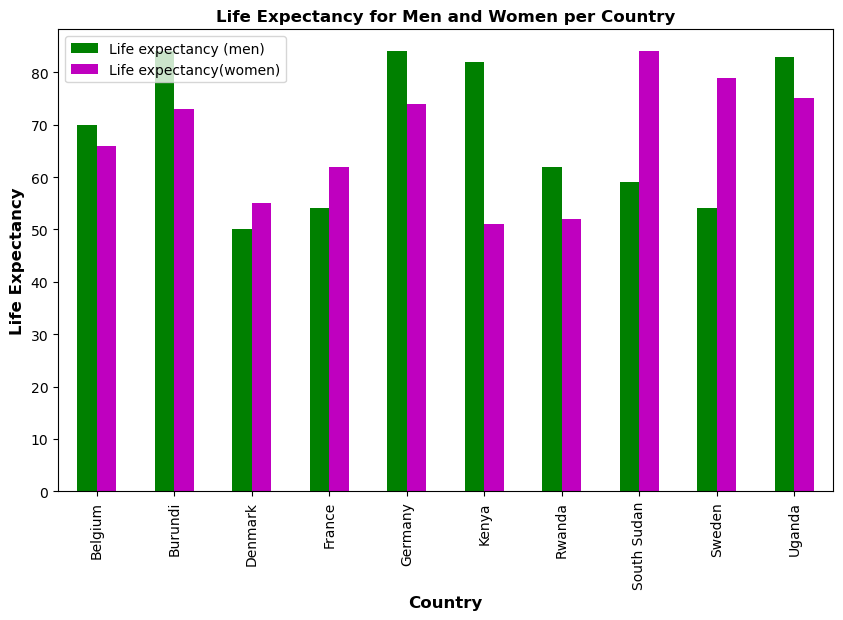

In [109]:
my_color =['green','m']

combined_eaeurope.plot(x="Country", y=["Life expectancy (men)", "Life expectancy(women)"], kind="bar",
 figsize=(10,6), color=my_color)

# Add labels
plt.title("Life Expectancy for Men and Women per Country",fontweight='bold')
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Life Expectancy", fontsize=12, fontweight='bold')

# Add legend

plt.legend()

plt.show()

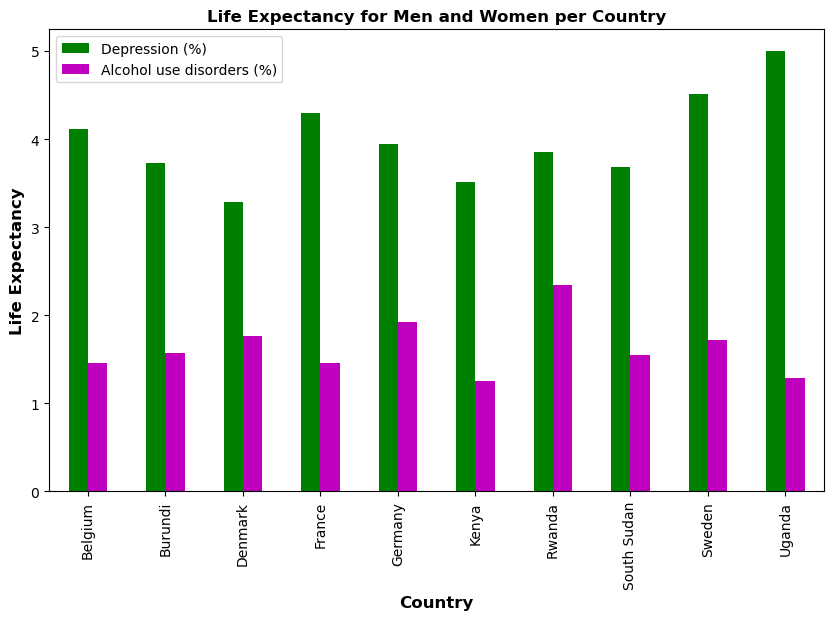

In [111]:
my_color =['green','m']

combined_eaeurope.plot(x="Country", y=["Depression (%)", "Alcohol use disorders (%)"], kind="bar",
 figsize=(10,6), color=my_color)

# Add labels
plt.title("Life Expectancy for Men and Women per Country",fontweight='bold')
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Life Expectancy", fontsize=12, fontweight='bold')

# Add legend

plt.legend()

plt.show()

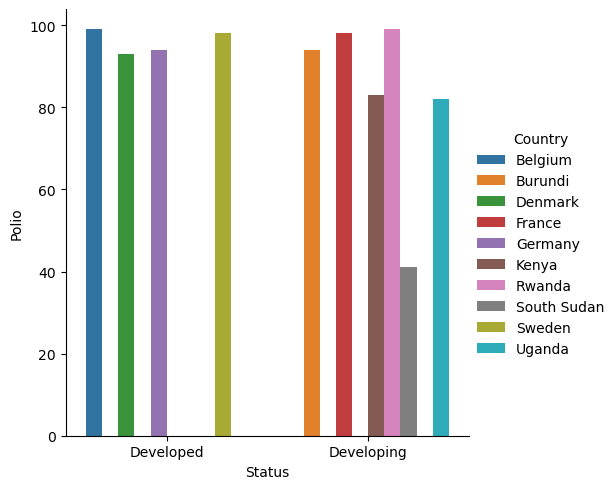

In [84]:
sns.catplot(x = 'Status', y='Life expectancy (men)', 
            hue = 'Country',data=combined_eaeurope, 
            kind='bar')


NameError: name 'plot' is not defined

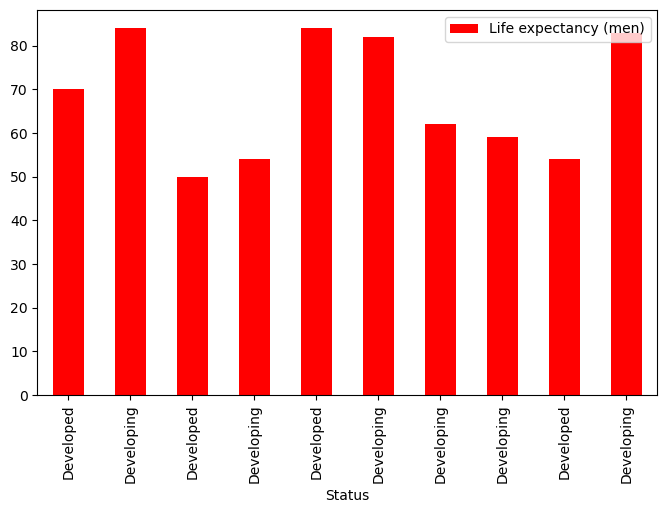

In [73]:
combined_eaeurope.plot(x = 'Status', y='Life expectancy (men)', 
        kind="bar",figsize=(8,5), color='red')
 
# Display the plot
plot.show()

<Axes: xlabel='Country', ylabel='Life expectancy (men)'>

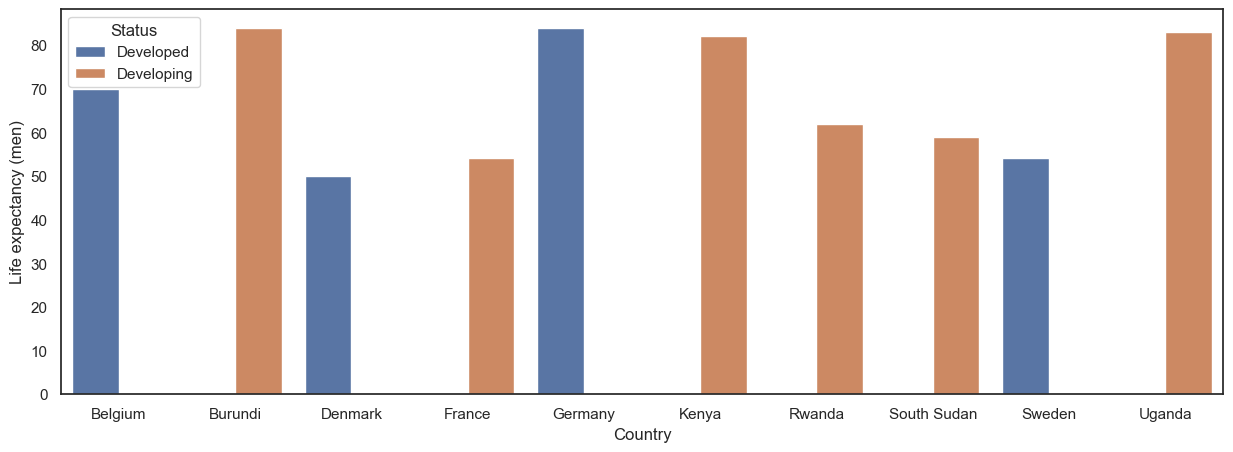

In [167]:
#set seaborn plotting aesthetics
fig, ax = plt.subplots(figsize=(15,5))
status_countries = mdata[(mdata['Country'] == 'France') | (mdata['Country'] == 'Belgium') | 
           (mdata['Country'] == 'Germany') | (mdata['Country'] == 'Sweden') | (mdata['Country'] == 'Denmark')|
              (mdata['Country'] == 'Kenya') | (mdata['Country'] == 'Uganda') | 
           (mdata['Country'] == 'Rwanda') | (mdata['Country'] == 'Burundi') | (mdata['Country'] == 'South Sudan')]

sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Country', y='Life expectancy (men)', hue='Status', data=status_countries) 

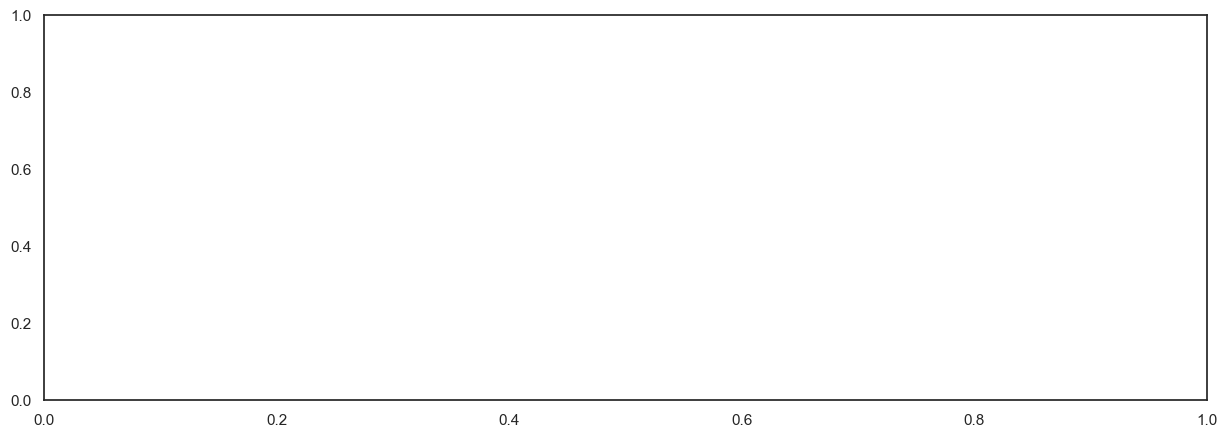

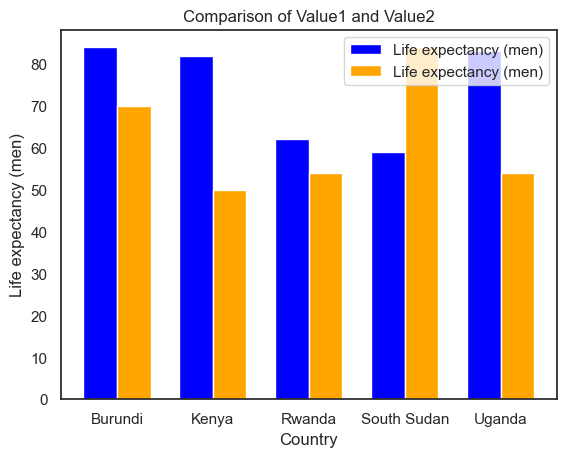

In [170]:
fig, ax = plt.subplots(figsize=(15,5))

df1 = ea
df2 = europe

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions1 = range(len(df1['Country']))
bar_positions2 = [x + bar_width for x in bar_positions1]

# Create the figure and axis objects
fig, ax = plt.subplots()
# Plot the bars for df1
ax.bar(bar_positions1, df1['Life expectancy (men)'], color='blue', width=bar_width, label='Life expectancy (men)')

# Plot the bars for df2
ax.bar(bar_positions2, df2['Life expectancy (men)'], color='orange', width=bar_width, label='Life expectancy (men)')

# Add x-axis labels and a title
ax.set_xlabel('Country')
ax.set_ylabel('Life expectancy (men)')
ax.set_title('Comparison of Value1 and Value2')

# Add legend
ax.legend()
# Set the x-axis tick positions and labels
ax.set_xticks([p + bar_width / 2 for p in bar_positions1])
ax.set_xticklabels(df1['Country'])

# Show the plot
plt.show()

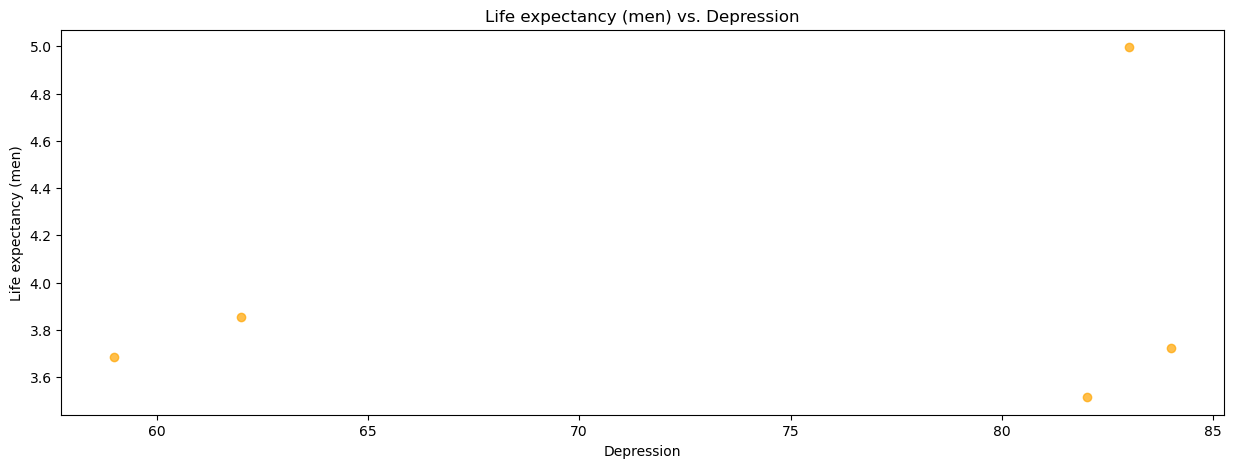

In [163]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(ea["Life expectancy (men)"], ea["Depression (%)"], alpha=0.7, color="orange")
ax.set_title("Life expectancy (men) vs. Depression")
ax.set_xlabel("Depression")
ax.set_ylabel("Life expectancy (men)");

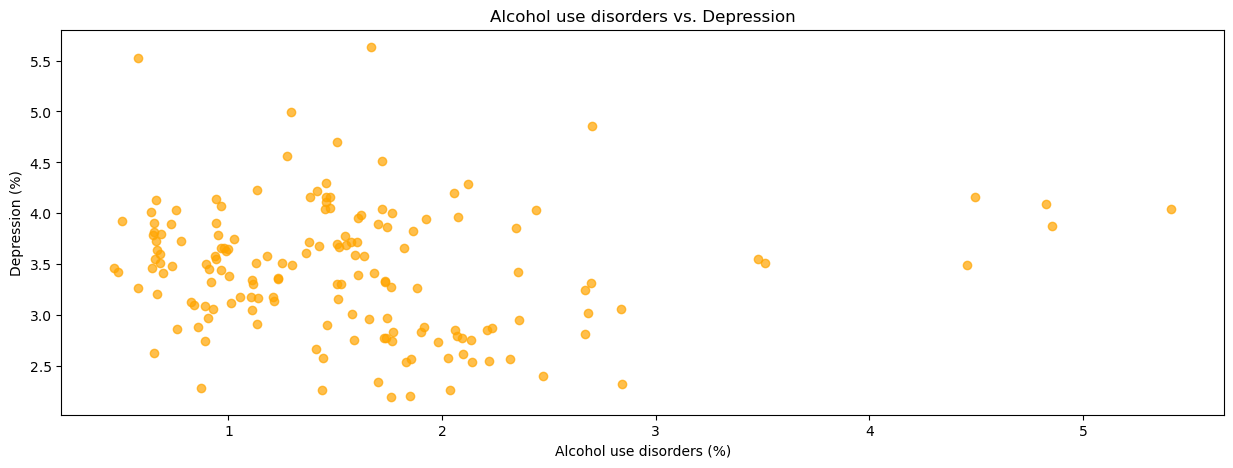

In [128]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(mdata["Alcohol use disorders (%)"], mdata["Depression (%)"], alpha=0.7, color="orange")
ax.set_title("Alcohol use disorders vs. Depression")
ax.set_xlabel("Alcohol use disorders (%)")
ax.set_ylabel("Depression (%)");

In [131]:
top5expmen = mdata.nlargest(5,'Life expectancy (men)')
top5expmen

,Country,Year_x,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Status,...,Hepatitis B(women),Measles,BMI,Under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources
34,Congo,2015,0.168902,0.613573,0.158622,3.266041,0.557216,4.041543,1.451650,Developing,...,60,1359,27.4,10,8.0,8.0,2.8,0.000000,0.0,0.590
2,Algeria,2015,0.197728,0.817862,0.211434,5.058398,1.709814,3.636962,0.665817,Developing,...,63,63,59.5,24,95.0,95.0,0.1,4132.762920,39871528.0,0.743
16,Belize,2015,0.194730,0.880893,0.257195,4.562088,0.832550,2.837546,1.771524,Developing,...,19,0,5.9,0,94.0,94.0,0.2,4849.997495,359288.0,0.706
17,Benin,2015,0.170013,0.639664,0.118821,2.901891,0.499514,3.627308,0.989687,Developing,...,49,55,25.7,39,78.0,82.0,1.0,783.947910,1575952.0,0.481
24,Burundi,2015,0.153772,0.612157,0.089309,3.574121,0.496275,3.723271,1.575593,Developing,...,20,9,18.7,31,94.0,94.0,0.7,33.681223,119927.0,0.406


Text(0, 0.5, 'Depression (%)')

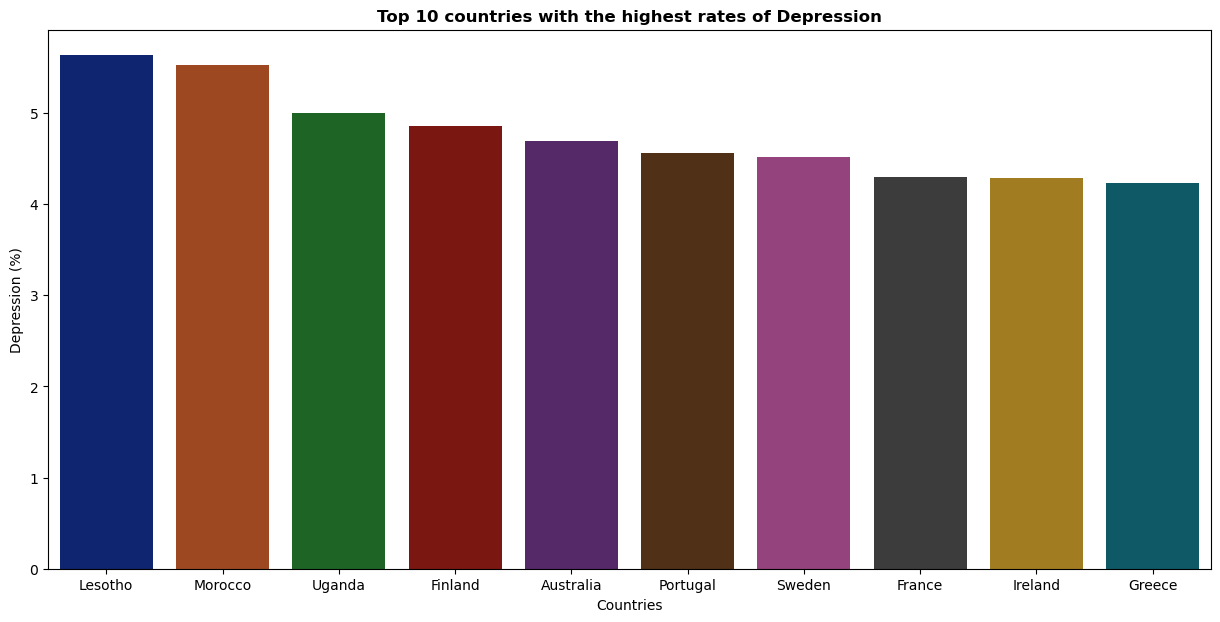

In [136]:
plt.figure(figsize = (15,7))
sns.barplot(data = mdata,
            x = 'Country',
            y = 'Depression (%)',
            order = mdata.sort_values('Depression (%)', ascending = False).Country.head(10),
            palette = 'dark')

#Set title, legend and x y axis
plt.title('Top 10 countries with the highest rates of Depression',
          fontweight='bold')

plt.xlabel('Countries')
plt.ylabel('Depression (%)')

Text(0, 0.5, 'Percentage expenditure')

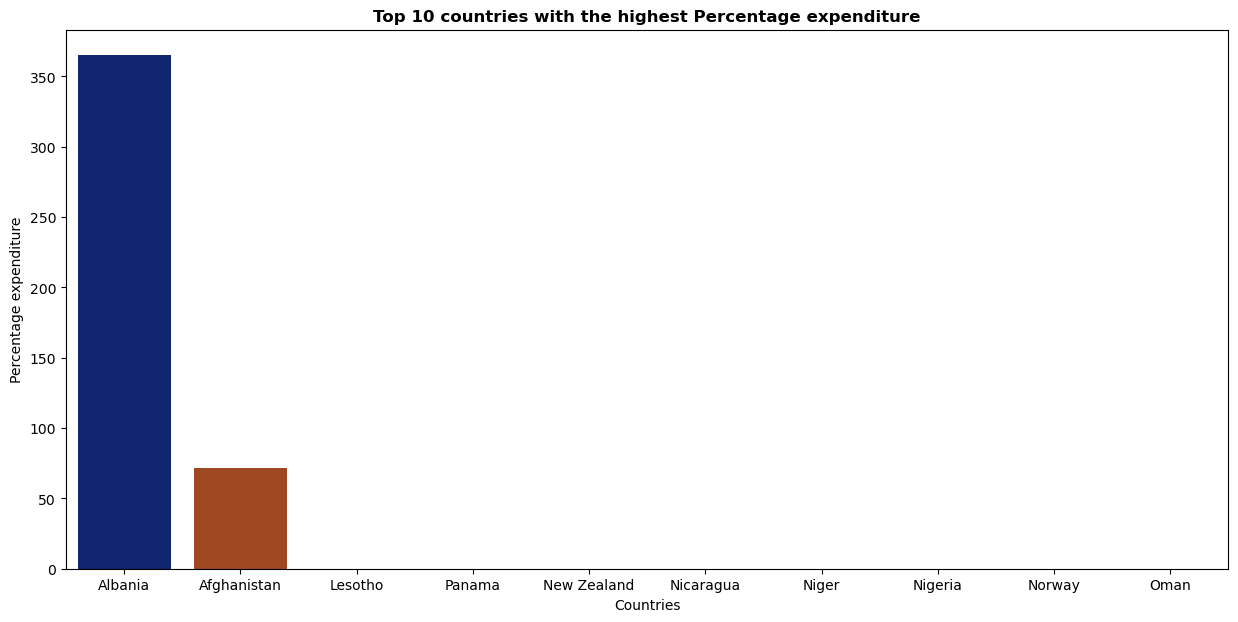

In [139]:
plt.figure(figsize = (15,7))
sns.barplot(data = mdata,
            x = 'Country',
            y = 'Percentage expenditure',
            order = mdata.sort_values('Percentage expenditure', ascending = False).Country.head(10),
            palette = 'dark')

#Set title, legend and x y axis
plt.title('Top 10 countries with the highest Percentage expenditure',
          fontweight='bold')

plt.xlabel('Countries')
plt.ylabel('Percentage expenditure')